In [19]:
#Import Useful Libaries

import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
import re
import warnings  
warnings.filterwarnings('ignore') # to ignore the warnings

In [3]:
#Load data

data = pd.read_csv('C:/Users/User/Desktop/Langara/luludata/train2.csv', encoding='latin1')
# As most of the words are from Western European Language hence encoding='latin1'
# Latin-1, also called ISO-8859-1, is an 8-bit character set endorsed by the 
# International Organization for Standardization (ISO) and represents the alphabets 
# of Western European languages. As its name implies, it is a subset of ISO-8859, 
# which includes several other related sets for writing systems like Cyrillic, Hebrew, and Arabic. 
# It is used by most Unix systems as well as Windows. DOS and Mac OS, however, use their own sets.


In [4]:
data.head()

# Quick look at the data

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,0,Hero 77 fountain pen,2,Other/Office supplies/Writing,NaN,12.0,1,"For sale a brand new Hero 77 fountain pen, doe..."
1,1,14K Yellow Gold Earrings,3,Women/Jewelry/Earrings,NaN,20.0,0,14k black Onyx earrings Good condition Final sale
2,2,New balance 2-in 1 size S dry fit shorts,2,Women/Athletic Apparel/Shorts,New Balance,10.0,0,"Brand new never worn, but I tore the tag off w..."
3,3,Zella black workout tank w mesh cut out,3,Women/Athletic Apparel/Shirts & Tops,Zella,15.0,1,Zella black workout tank with mesh cut outs.
4,4,NWT Lilly Pulitzer gabby dress sz 8,1,"Women/Dresses/Above Knee, Mini",Lilly Pulitzer,75.0,0,New with tags!! Size 8.


In [6]:
data.info()

# Get more information about the data shape, type and format

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148253 entries, 0 to 148252
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   train_id           148253 non-null  int64  
 1   name               148253 non-null  object 
 2   item_condition_id  148253 non-null  int64  
 3   category_name      147612 non-null  object 
 4   brand_name         85262 non-null   object 
 5   price              148253 non-null  float64
 6   shipping           148253 non-null  int64  
 7   item_description   148253 non-null  object 
dtypes: float64(1), int64(3), object(4)
memory usage: 9.0+ MB


In [8]:
# Check for number of missing values 

data.isnull().sum()

train_id                 0
name                     0
item_condition_id        0
category_name          641
brand_name           62991
price                    0
shipping                 0
item_description         0
dtype: int64

In [9]:
# Make a copy of the data 

data1 = data.copy()

In [12]:
# Handling missing values

for value in ['category_name']:
    data1[value].fillna(value='Other', inplace=True)
    
for value in ['brand_name']:
    data1[value].fillna(value='Unknown', inplace=True)

In [14]:
# Check the null values

data1.isnull().sum()

train_id             0
name                 0
item_condition_id    0
category_name        0
brand_name           0
price                0
shipping             0
item_description     0
dtype: int64

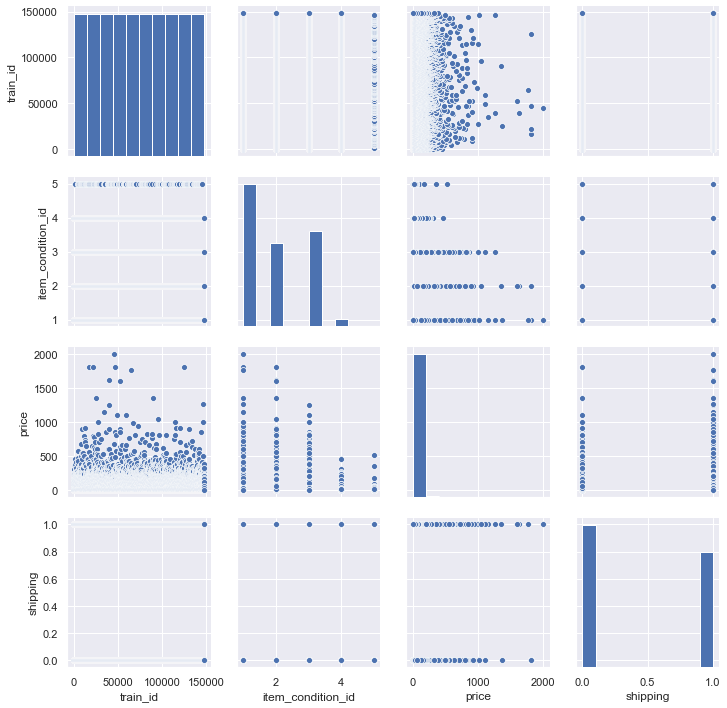

In [33]:
# Checking relationships between varibales

sns.pairplot(data1)

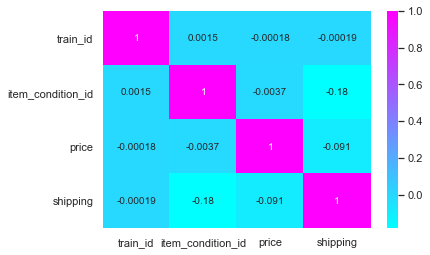

In [41]:
# Checking the correlation for any multicollinearity effect

sns.heatmap(data1.corr(),cmap='cool',annot=True)


## Descriptive Analysis on Each Variable for Lululemon

### Price


In [43]:
# Get only Lululemon data

luldata = data1[data1['brand_name']=='Lululemon']

In [44]:
# Independent Varibale : Price

luldata['price'].describe()

count    1427.000000
mean       46.531184
std        29.752525
min         5.000000
25%        26.000000
50%        39.000000
75%        59.000000
max       331.000000
Name: price, dtype: float64

Text(0.5, 0, 'Price')

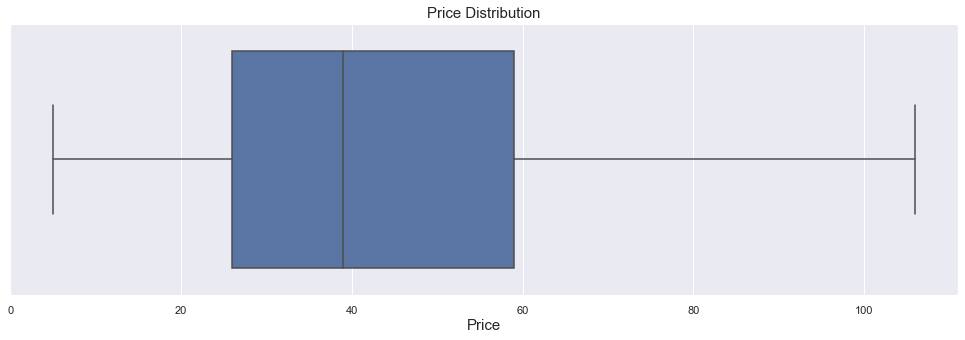

In [45]:
# Boxplot showing the range of price

plt.figure(figsize=(17,5))
plt.title('Price Distribution', fontsize=15)
sns.boxplot(luldata['price'], showfliers=False)
plt.xlabel('Price',fontsize=15)

 **Insight 1 from Price**

* mean = 47, median = 39, min = 5, max = 331
* 25% of the products are priced below 26 dollars
* 50% of products are priced below 39 dollars
* 75% of products are priced below 59 dollars
* Also, the maximum price that any product has is 331 dollars

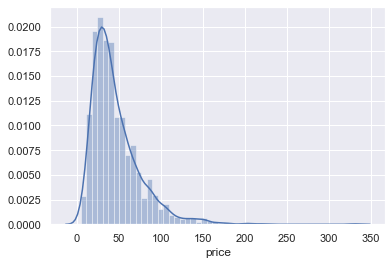

In [46]:
plt.plot(figsize=(30,20))
sns.distplot(luldata['price'])

* We can observe that the price distribution is slightly right-skewed given the extreme values on the right

* In other to ensure the distribution follows normal distribution by making the spread balanced both low and high prices

* log1p = log(p) + 1, we add 1 to avoid zero(log0=infinity) and negative values


Text(0.5, 1.0, 'Price Distribution')

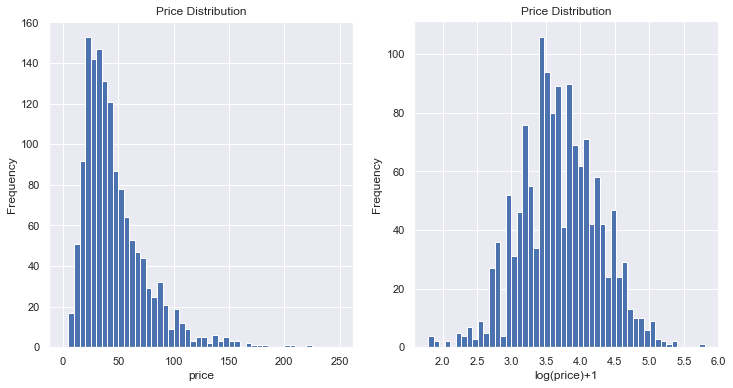

In [47]:
# Lets compare both graphs

plt.subplot(1, 2, 1)
(luldata['price']).plot.hist(bins=50, figsize=(12, 6), edgecolor = 'white', range = [0, 250])
plt.xlabel('price', fontsize=12)
plt.title('Price Distribution', fontsize=12)

plt.subplot(1, 2, 2)
np.log1p(luldata['price']).plot.hist(bins=50, figsize=(12, 6), edgecolor='white')
plt.xlabel('log(price)+1', fontsize=12)
plt.title('Price Distribution', fontsize=12)

### Shipping


In [48]:
 # To show as a percentage of total values
    
print("Regular: ",'\n', luldata['shipping'].value_counts(),'\n','\n',"Normalized :",'\n',luldata['shipping'].value_counts(normalize=True))

Regular:  
 0    1018
1     409
Name: shipping, dtype: int64 
 
 Normalized : 
 0    0.713385
1    0.286615
Name: shipping, dtype: float64


Text(0.5, 1.0, 'Analysis on Shipping Paid')

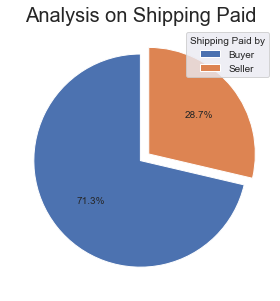

In [49]:
index = ['Buyer','Seller']
values =  luldata['shipping'].value_counts()
plt.figure(figsize=(7,4))
plt.pie(values,startangle=90,autopct='%0.1f%%',explode=(0,0.1))
plt.legend(title = "Shipping Paid by",loc = "upper right",labels= index,fontsize=10)
plt.tight_layout()
plt.title("Analysis on Shipping Paid",fontsize=20)

**Insight 1 from shipping:**

* 0 - 1018 times (buyer charged) 71.3%
* 1 - 409 times(seller charged) 28.7%
* Over 71% of items' shipping fee were paid by the buyers

**Suggestion to the seller:**

* The above insight matches with our perception that the sellers need to keep a lower price to compensate for the additional shipping

To check how shipping is related to the price:


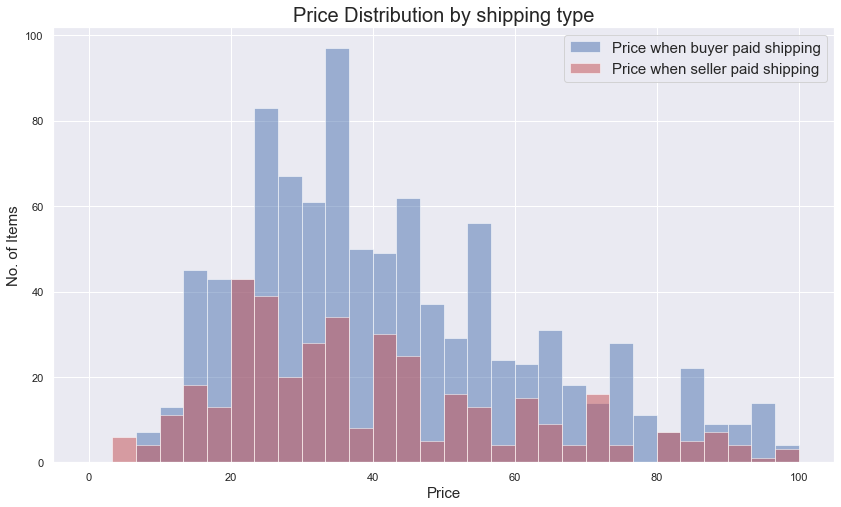

In [50]:
buyer_charged = luldata.loc[luldata['shipping'] == 0, 'price']
seller_charged = luldata.loc[luldata['shipping'] == 1, 'price']


fig, ax = plt.subplots(figsize=(14, 8))
ax.hist(buyer_charged, bins=30, range=[0, 100], label='Price when buyer paid shipping', alpha=0.5, color='b')
ax.hist(seller_charged, bins=30, range=[0, 100], label='Price when seller paid shipping', alpha=0.5, color='r')
plt.title('Price Distribution by shipping type', fontsize = 20)
plt.xlabel('Price', fontsize = 15)
plt.ylabel('No. of Items', fontsize = 15)
plt.legend(fontsize = 15)

**Insight 2 from shipping:**

* The price when buyer pays is high compared to when seller pays


In [51]:
# The actual values are shown below

# average price for shipping for seller and buyer
print('The average price is {}'.format(round(seller_charged.mean(), 2)), 'if seller pays shipping')
print('The average price is {}'.format(round(buyer_charged.mean(), 2)), 'if buyer pays shipping')

The average price is 43.82 if seller pays shipping
The average price is 47.62 if buyer pays shipping


### Category Name


In [52]:
# Number of unique categories

print('There are', luldata['category_name'].nunique(), 'unique values in category name column')

There are 60 unique values in category name column


In [54]:
# Top 20 most common category

luldata['category_name'].value_counts()[:20]

Women/Athletic Apparel/Pants, Tights, Leggings     504
Women/Athletic Apparel/Shirts & Tops               289
Women/Athletic Apparel/Shorts                      166
Women/Athletic Apparel/Sports Bras                 110
Women/Athletic Apparel/Jackets                      94
Women/Tops & Blouses/Tank, Cami                     51
Women/Women's Accessories/Hair Accessories          28
Women/Pants/Capris, Cropped                         22
Women/Athletic Apparel/Skirts, Skorts & Dresses     14
Men/Athletic Apparel/Shorts                         10
Women/Women's Accessories/Scarves & Wraps           10
Women/Tops & Blouses/T-Shirts                       10
Men/Athletic Apparel/Shirts & Tops                   9
Women/Women's Handbags/Totes & Shoppers              8
Women/Women's Handbags/Messenger & Crossbody         8
Women/Sweaters/Hooded                                8
Men/Tops/T-shirts                                    7
Women/Sweaters/Crewneck                              6
Women/Wome

**General Observations from the above insights:**

* It is seen in this table that a subcategory in the category name is seperated by a slash "/"
* For ex. Women/Athletic Apparel/Pants, Tights, Leggings

* This means Women category has a subcategory Athletic Apparel and this sub category Athletic Apparel is further divided into Pants, Tights and Leggings

* It is also observed that Women apparel has the maximum number of items followed by any other category.

* The category names are listed by ‘/’ delimiter which tells about the main category, sub-category 1 and sub-category 2 of the products.
* Therefore, to get better idea of each product, we will do feature engineering here and split the category name into 3 different columns namely, ‘Main_categ’, ‘sub_categ1’ and ‘sub_categ2’.

In [55]:
# Divide category names into Main category, Sub-category 1 and Sub-category 2:

temp = luldata[luldata['brand_name']!='Unknown'] # remove Unknown coz it represents missing values
luldata[['Main_categ','sub_categ1','sub_categ2']] = luldata.category_name.str.split("/",expand = True,n= 2)
for i in ['sub_categ1','sub_categ2']:
    luldata[i].fillna(value = "Label not given", inplace=True)

In [56]:
print('There are', luldata['Main_categ'].nunique(), 'unique values in Main category')
print('There are', luldata['sub_categ1'].nunique(), 'unique values in Sub-category 1')
print('There are', luldata['sub_categ2'].nunique(), 'unique values in Sub-category 2')

There are 3 unique values in Main category
There are 18 unique values in Sub-category 1
There are 51 unique values in Sub-category 2


In [60]:
luldata[['Main_categ','sub_categ1','sub_categ2']].head(3)

,Main_categ,sub_categ1,sub_categ2
69,Women,Athletic Apparel,"Pants, Tights, Leggings"
169,Women,Athletic Apparel,"Pants, Tights, Leggings"
211,Women,Athletic Apparel,Shirts & Tops


#### Main Category

Finding out which of the products rank the highest in terms of frequency of occurrence:

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

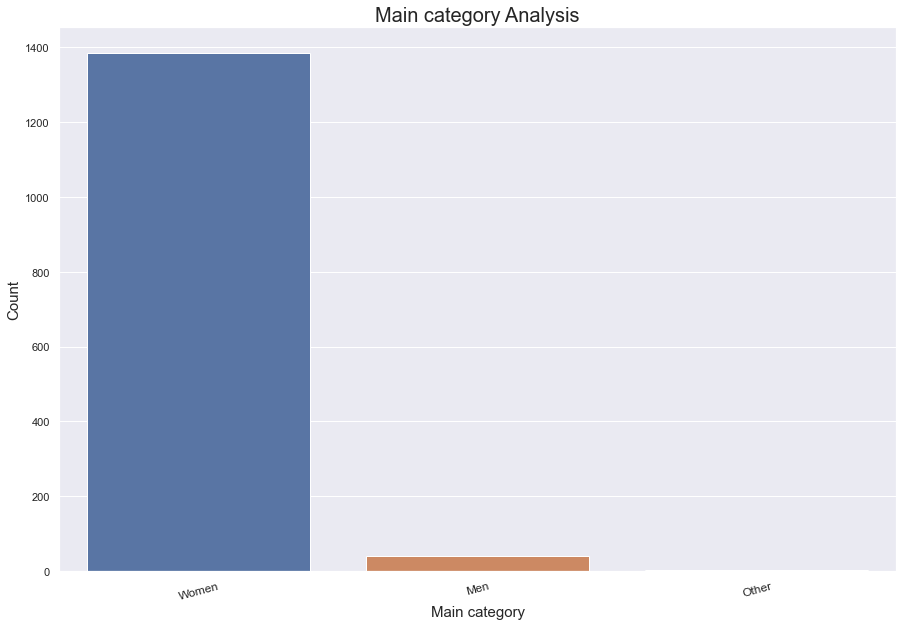

In [61]:
maincat_count = luldata.Main_categ.value_counts()

plt.figure(figsize=(15, 10))
sns.barplot(maincat_count.index[0:11], maincat_count[0:11])
plt.title('Main category Analysis',fontsize = 20)
plt.xlabel('Main category',fontsize = 15)
plt.ylabel('Count',fontsize = 15)
plt.xticks(rotation=15, fontsize=12)

**Insight 1 from Main Category:**

* It can be observed that Women products occur with the maximum frequency by a huge margin, followed by Men products. The 3rd general category is Other products

**Main category vs Price:**

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

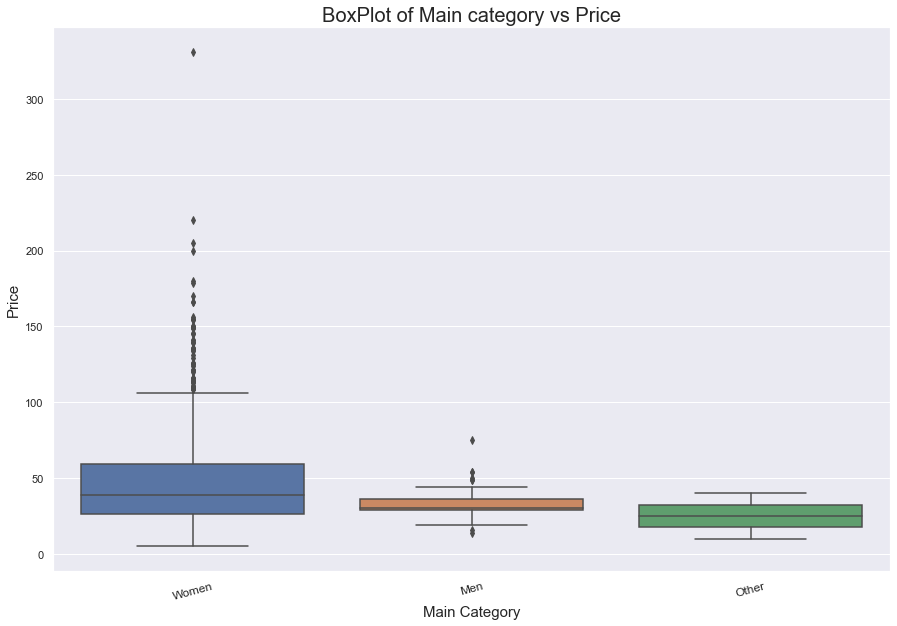

In [64]:
temp = luldata[luldata['price'] < 332]
plt.figure(figsize=(15, 10))
sns.boxplot(temp['Main_categ'], temp['price'])
plt.title('BoxPlot of Main category vs Price', fontsize = 20)
plt.xlabel('Main Category',fontsize = 15)
plt.ylabel('Price',fontsize = 15)
plt.xticks(rotation = 15, fontsize=12)

In [65]:
print(temp.groupby(['Main_categ'])['price'].agg('median'))

print(temp.groupby(['Main_categ'])['price'].agg('mean'))

Main_categ
Men      30.0
Other    25.0
Women    39.0
Name: price, dtype: float64
Main_categ
Men      34.000000
Other    25.000000
Women    46.933526
Name: price, dtype: float64


**Insight 2 from Main category:**

* Maximum products are purchased in the Women's category, the price of Men category products(30 dollars) is closer in price to Other category (25 dollars) compared to Women category (39 dollars)

#### Sub-category 1:

* As there are 18 unique sub categories, we will be able to plot them all.

In [66]:
index = []
[index.append(key) for key, value in Counter(luldata['sub_categ1']).most_common()]
top_18 = index[:18]
temp = luldata[luldata['sub_categ1'].isin(top_18)] 
# the corresponding top 18 indexes get their corresponding names from "sub_categ1"

Text(0, 0.5, 'Frequency')

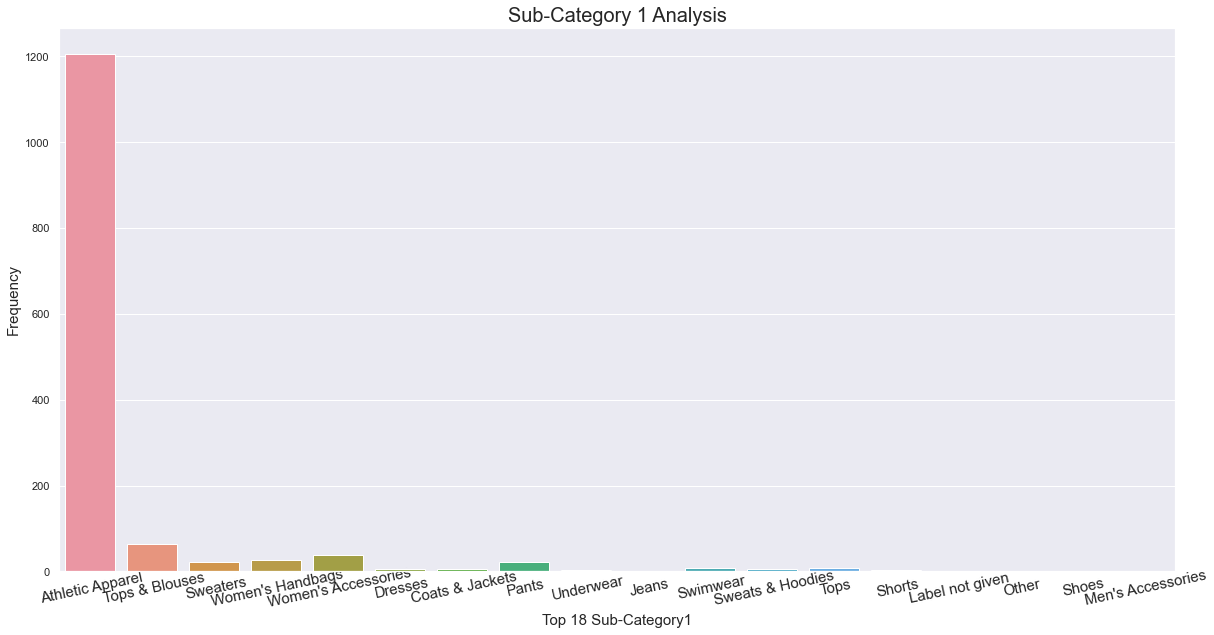

In [71]:
plt.figure(figsize=(20,10))
sns.countplot(temp['sub_categ1'])
plt.title('Sub-Category 1 Analysis',fontsize = 20)
plt.xticks(rotation = 12,wrap = True,fontsize = 15)
plt.xlabel('Top 18 Sub-Category1',fontsize = 15)
plt.ylabel('Frequency',fontsize = 15)

**Insight 1 from Sub-category 1:**

* Most of the products from Sub-category 1 are bought from Athletic Apparel and Tops and Blouses category


**Sub-category 1 vs Price:**

Text(0, 0.5, 'Price')

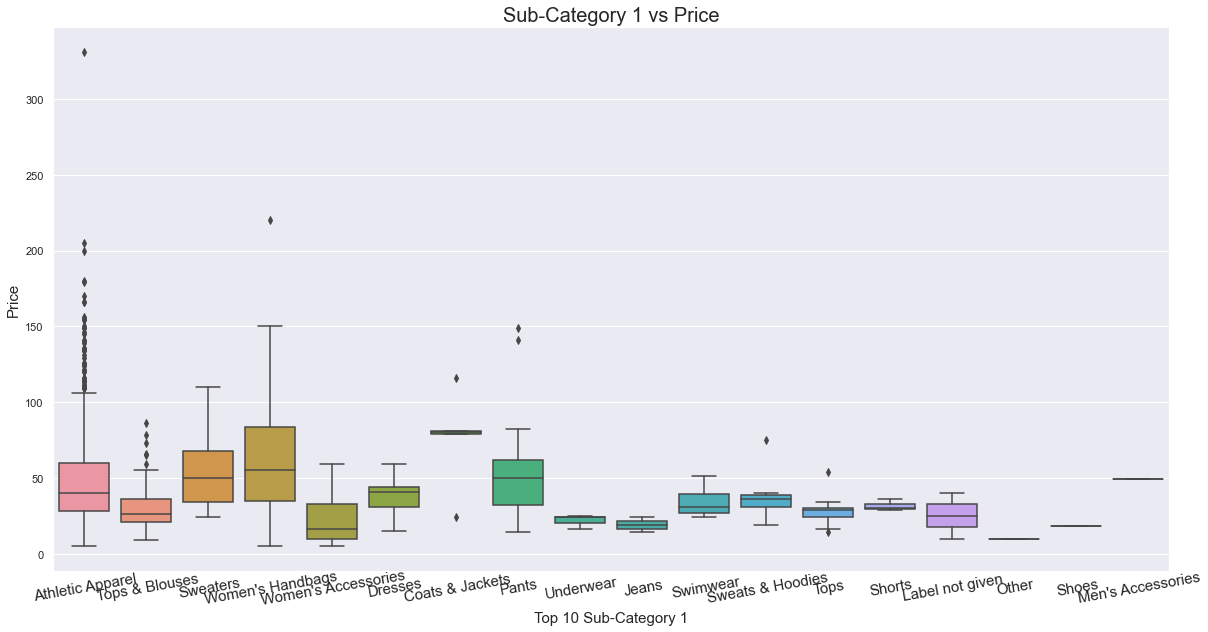

In [72]:
temp2 = temp[temp['price']<332] # box plot
plt.figure(figsize=(20,10))
sns.boxplot(temp2['sub_categ1'],temp2['price'])
plt.title('Sub-Category 1 vs Price',fontsize = 20)
plt.xticks(rotation = 10,wrap = True,fontsize = 15)
plt.xlabel('Top 10 Sub-Category 1',fontsize = 15)
plt.ylabel('Price',fontsize = 15)

In [73]:
temp2.groupby(['sub_categ1'])['price'].agg('median')

sub_categ1
Athletic Apparel       40.0
Coats & Jackets        80.0
Dresses                41.0
Jeans                  19.0
Label not given        25.0
Men's Accessories      49.0
Other                  10.0
Pants                  50.0
Shoes                  18.0
Shorts                 30.0
Sweaters               50.0
Sweats & Hoodies       36.0
Swimwear               31.0
Tops                   29.0
Tops & Blouses         26.0
Underwear              24.0
Women's Accessories    16.0
Women's Handbags       55.5
Name: price, dtype: float64

**Insight 2 from Sub-category 1:**

* Products in Athletic Apparel is cheaper than Dresses by 1 dollar
* Products in Coats & Jackets category is more expensive thus has low frequency
* Hence its satisfies the logic that Expensive products are bought less number of times

#### Sub-category 2:

There are 51 unique categories in sub-category 2, hence we need to get information on only the top 10 categories

Text(0, 0.5, 'Frequency')

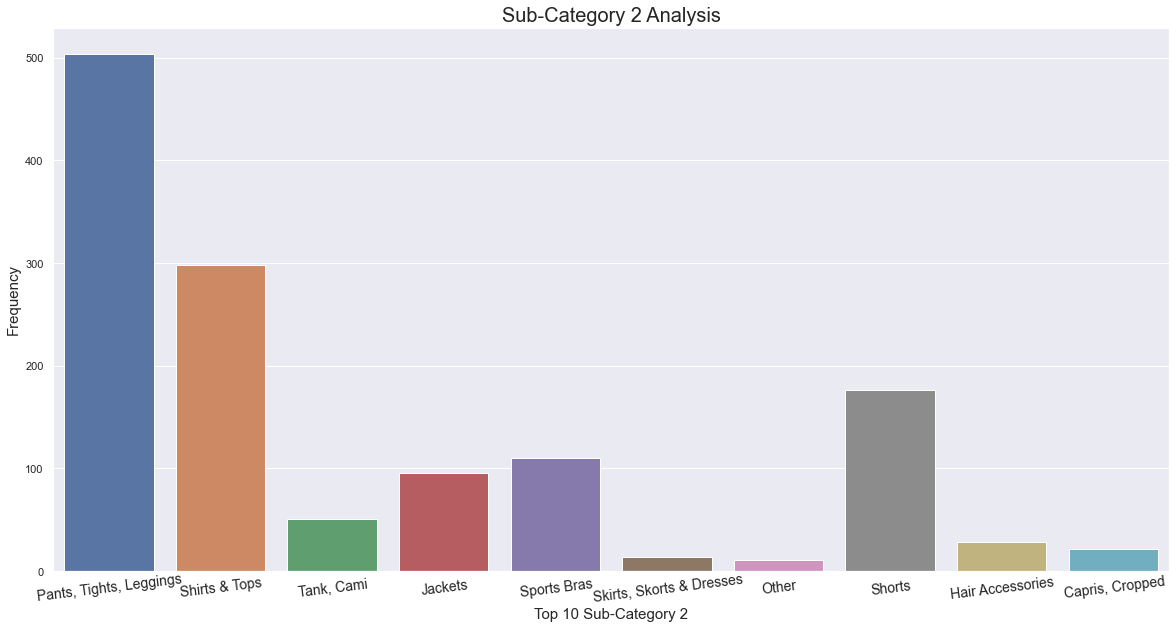

In [77]:
index = []
[index.append(key) for key, value in Counter(luldata['sub_categ2']).most_common()]
top_10 = index[:10]
temp = luldata[luldata['sub_categ2'].isin(top_10)]

plt.figure(figsize=(20,10))
sns.countplot(temp['sub_categ2'])
plt.title('Sub-Category 2 Analysis',fontsize = 20)
plt.xticks(rotation = 7,wrap = True,fontsize = 14)
plt.xlabel('Top 10 Sub-Category 2',fontsize = 15)
plt.ylabel('Frequency',fontsize = 15)

**Insight 1 from Sub-category 2:**

* Products under category Pants,Tights,Leggings are bought the highest number of times

**Sub-category 2 vs Price:**

Text(0, 0.5, 'Price')

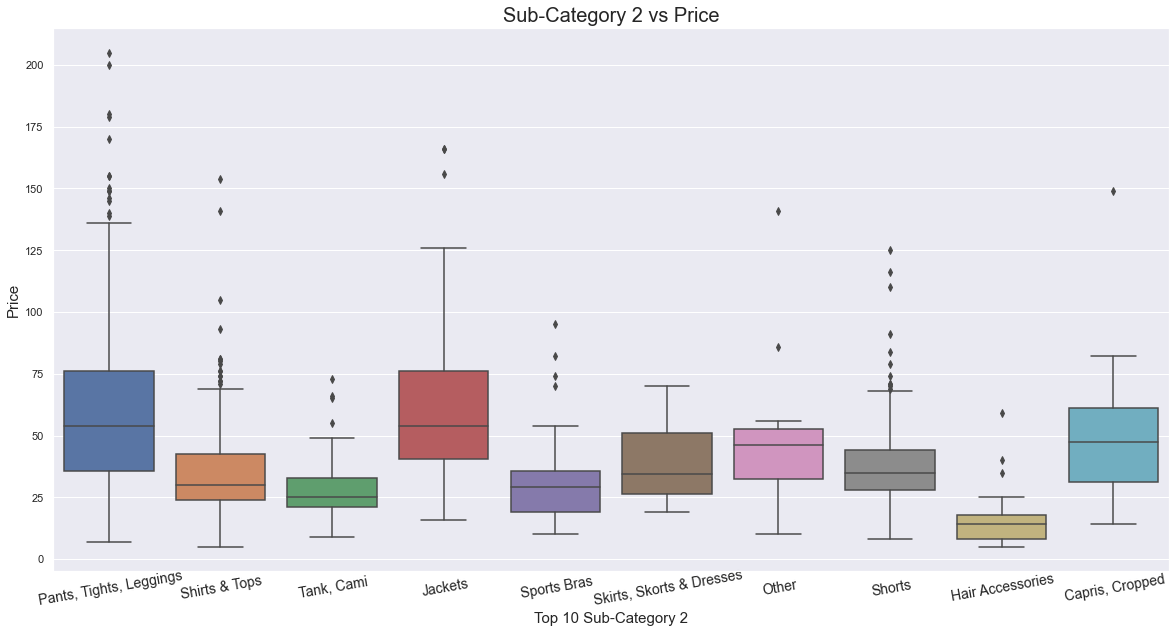

In [78]:
temp2 = temp[temp['price']<331]
plt.figure(figsize=(20,10))
sns.boxplot(temp2['sub_categ2'],temp2['price'])
plt.title('Sub-Category 2 vs Price', fontsize = 20)
plt.xticks(rotation = 10,wrap = True,fontsize = 14)
plt.xlabel('Top 10 Sub-Category 2', fontsize = 15)
plt.ylabel('Price', fontsize = 15)

In [79]:
temp2.groupby(['sub_categ2'])['price'].agg('median')

sub_categ2
Capris, Cropped             47.5
Hair Accessories            14.0
Jackets                     54.0
Other                       46.0
Pants, Tights, Leggings     54.0
Shirts & Tops               30.0
Shorts                      35.0
Skirts, Skorts & Dresses    34.5
Sports Bras                 29.0
Tank, Cami                  25.0
Name: price, dtype: float64

**Insight 2 from Sub-Category 2:**

* Despite high average price, products in Pants,Tights,Leggings category are bought the most as they are properly designed and marketed effectively


## Natural Language Processing

### Item Description

First we create a function to return us a count of words from each Description



In [138]:
def length(description):
    count = 0
    for i in description.split():
        count+=1
    return count

Then we create a series which has the description and the length of description in words

In [139]:
lul=[]
for i in luldata['item_description']:
    temp=[]
    temp.append(i)
    temp.append(length(str(i)))
    lul.append(temp)

In [140]:
# Check

print(lul[0:4])

[['colors-gray/black. size 6!! worn twice in excellent condition:)!!', 8], ["Tag is gone but I think it's a 6 or 8", 11], ['Lululemon Daily Tank Feathered Fossil/ White Beachy Floral Print Gray No tears / No Stains Color gray & white Size 8 (medium) Please view pictures to see the condition of item. Please feel free to comment me with any questions prior to buying the item. The item pictured is exactly what I ship to you. NO HOLDS due to policies First Come,First Serve', 63], ["Never worn, no tags, special edition If You're Lucky Tank size 8 in white. Beautiful flowy, loose fit. Gorgeous pink color flattering on all skin types. Mesh details. Perfect summer tank. I have the same in BLK and I wear it out to dinner. Its sweat wicking and my fav.", 50]]


In [149]:
mydf = pd.DataFrame(lul, columns=['Description', 'Description_length'])
print(mydf.head(2))

                                         Description  Description_length
0  colors-gray/black. size 6!! worn twice in exce...                   8
1              Tag is gone but I think it's a 6 or 8                  11


In [154]:
mydf[mydf['Description_length'].notna()]['Description_length'].dropna(inplace=True)

In [155]:
# Adding the second column of the new dataframe to luludata

luldata['Description_length'] = mydf[mydf['Description_length'].notna()]['Description_length']

In [164]:
luldata.dropna(inplace=True)

In [168]:
luldata['Description_length'].value_counts()

24.0    2
10.0    2
7.0     2
14.0    2
22.0    1
9.0     1
35.0    1
16.0    1
39.0    1
38.0    1
17.0    1
41.0    1
68.0    1
12.0    1
5.0     1
64.0    1
Name: Description_length, dtype: int64

Text(0, 0.5, 'Frequency')

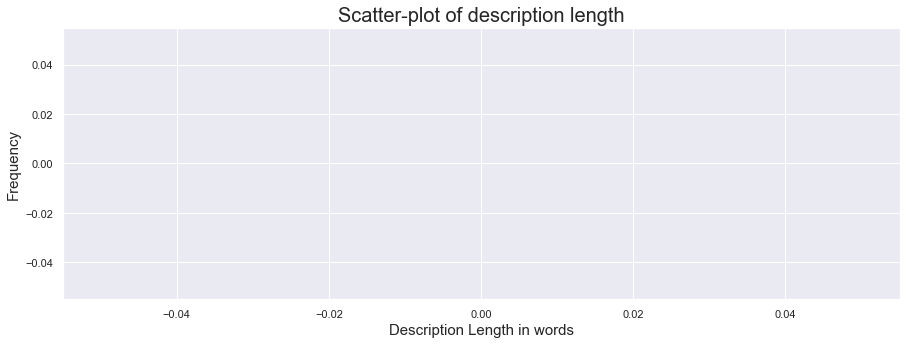

In [172]:
plt.figure(figsize=(15,5))
sns.scatterplot(x=luldata['Description_length'], y=luldata['Description_length'].value_counts())
plt.title('Scatter-plot of description length',fontsize=20)
plt.xlabel("Description Length in words",fontsize=15)
plt.ylabel("Frequency",fontsize=15)

**Item Description VS Price**

Text(0, 0.5, 'Price')

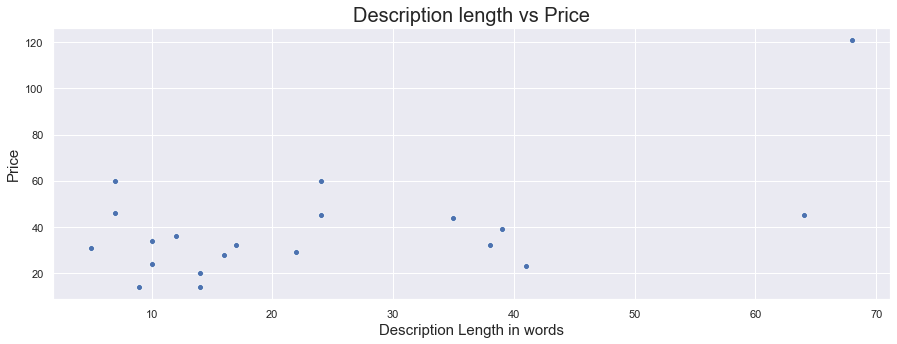

In [171]:
temp4=luldata[luldata['Description_length']<500]
plt.figure(figsize=(15,5))
sns.scatterplot(x=temp4['Description_length'], y=data1.price)
plt.title('Description length vs Price',fontsize=20)
plt.xlabel("Description Length in words",fontsize=15)
plt.ylabel("Price",fontsize=15)

**Insight 2 from Item Description:**

* As the item description gets longer the price has no clear pattern as it increases and decreases in various cases but the max length has the highest price

**Text Processing:**

Most of the time, the first steps of an NLP project is to "tokenize" your documents, which main purpose is to normalize our texts. The three fundamental stages will usually include:

* Break the descriptions into sentences and then break the sentences into tokens
* Remove punctuation and stop words
* Lowercase the tokens

**Wordcloud for Item Description:**
To check frequently occuring most **important words** in the description

In [189]:
from nltk.corpus import stopwords
stopwords = set(stopwords.words("english"))
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
from PIL import Image

# Checking length of stop words
len(stopwords)
from string import punctuation
punctuation = list(punctuation)

# Adding punctuation to stopwords
stopwords.update(punctuation)


In [199]:
luldata.drop(['Length'],axis=1,inplace=True)

In [237]:
luldata.index[luldata['item_description']=='Great condition'][0]

382

In [238]:
luldata = luldata.reset_index(drop=True)

In [239]:
luldata['item_description']

0     colors-gray/black. size 6!! worn twice in exce...
1                 Tag is gone but I think it's a 6 or 8
2     Lululemon Daily Tank Feathered Fossil/ White B...
3     Never worn, no tags, special edition If You're...
4                                       Great condition
5     In beautiful Bordeaux Drama. Looking for this ...
6     NWT price includes free shipping Price is firm...
7     Lululemon Run: For Your Life Tank in Heathered...
8     Like New Lululemon Rain type Jacket Light Hood...
9     Light green All tied up tank, size 6, lightly ...
10    Lululemon sports bra. Size 12 in great conditi...
11    SALE! Lululemon Size 2 Hooded Athletic Top Bla...
12    Blue purple black leggings Excellent condition...
13    Size 4 and is black. Worn maybe max 4-5 times....
14    Medium gray w/6 neon hot orange straps is very...
15    Women's Lululemon sports bra. Size: 6. Color: ...
16    Super cute. Slightly faded color & only other ...
17    Lululemon yoga pants in awesome like new c

In [240]:
# Wordcloud for Item Description variable with most occuring words
doc1 = []
for i in range(0,luldata.shape[0]):
    text = str(luldata['item_description'][i])
    text = text.lower()
    text = re.sub("[^a-zA-Z]", " ", text)
    text = nltk.word_tokenize(text)
    text = [lemmatizer.lemmatize(word) for word in text if word not in stopwords and len(word)>2]
    text = " ".join(text)
    doc1.append(text)

# Join string
doc2 = "".join(doc1)

In [241]:
# wordcloud visualization
img = np.array(Image.open("C:/Users/User/Desktop/Langara/luludata/wine_mask_xgk1tq.png"))
img
# The way the masking functions works is that it requires all 
# white part of the mask should be 255 not 0 (integer type). 
# This value represents the "intensity" of the pixel. 
# Values of 255 are pure white, whereas values of 1 are black


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [242]:
def transform_format(val):
    if val == 0:
        return 255
    else:
        return val


In [243]:
# Transform your mask into a new one that will work with the function:
transformed_wine_mask = np.ndarray((img.shape[0],img.shape[1]), np.int32)

for i in range(len(img)):
    transformed_wine_mask[i] = list(map(transform_format, img[i]))

In [244]:
# Check the expected result of your mask
transformed_wine_mask

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]])

(-0.5, 511.5, 511.5, -0.5)

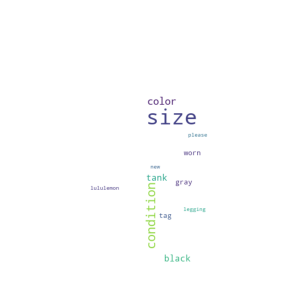

In [246]:
wordcloud = WordCloud(width=1000,height= 500,relative_scaling=1.0,mask=transformed_wine_mask,max_words=1000,
                      background_color='white',
                      stopwords=stopwords,
                      min_font_size=10).generate(doc2)

plt.figure(figsize=(10,5), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")

**WordCloud for Item Description of Top 6 Categories**

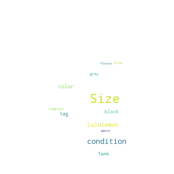

In [247]:
from nltk.corpus import stopwords
from PIL import Image
stp=set(stopwords.words('english'))
j=0
plt.figure(figsize=(8,10))
for i in luldata["Main_categ"].value_counts().index[:6]:
    text = luldata.loc[luldata["Main_categ"] == str(i)]["item_description"]
    # text = luludata.loc[luludata['main_category']==str(i)]
    # text = text['item_description']
    text = "".join(text)
    img = np.array(Image.open("C:/Users/User/Desktop/Langara/luludata/wine_mask_xgk1tq.png"))
    
    # Transform your img into a new one that will work with the function:
    mask = np.ndarray((img.shape[0],img.shape[1]), np.int32)

    for i in range(len(img)):
        mask[i] = list(map(transform_format, img[i]))
        
            
    wordcloud = WordCloud(width=2000, height=1500, relative_scaling=1.0, max_words=100, mask=mask,
                          background_color='white',
                          stopwords=stp,
                          min_font_size=10,).generate(text)
# # With relative_scaling=1, a word that is twice as frequent will have twice the size. 
# # If you want to consider the word frequencies and not only their rank, relative_scaling around .5 often looks good. 
# # If ‘auto’ it will be set to 0.5 unless repeat is true, in which case it will be set to 0.    
    
#     # plot the WordCloud image
    if j < 6:
        j = j + 1
        plt.subplot(3,2,j)
        plt.imshow(wordcloud)
        plt.axis("off")
        

#### Item Condition

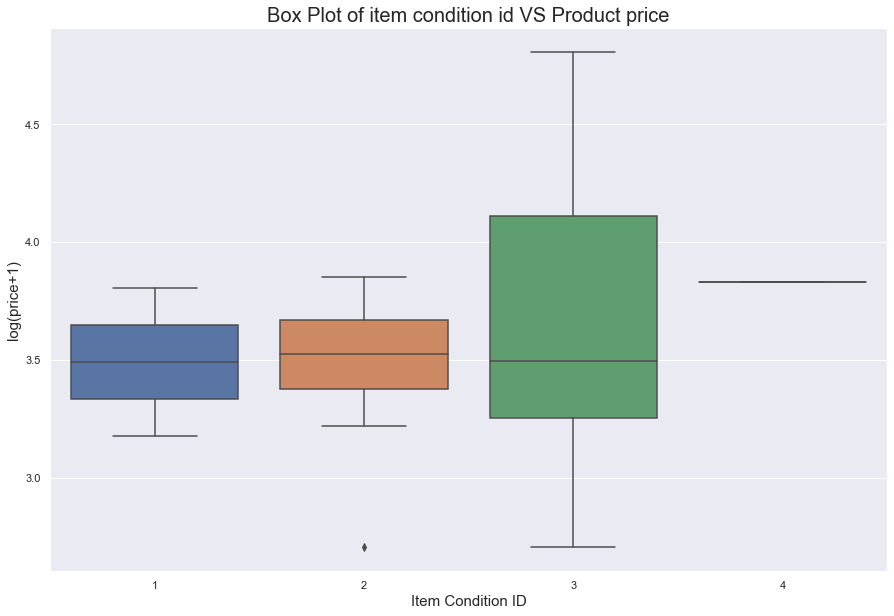

In [248]:
plt.figure(figsize=(15, 10))
sns.boxplot(x=luldata['item_condition_id'], y=np.log1p(luldata.price))
plt.title('Box Plot of item condition id VS Product price',fontsize=20)
plt.xlabel('Item Condition ID',fontsize=15)
plt.ylabel('log(price+1)',fontsize=15)
plt.show()

In [249]:
luldata.groupby(['item_condition_id'])['price'].agg('median')

item_condition_id
1    33.5
2    33.0
3    32.0
4    45.0
Name: price, dtype: float64

**Insight 1 from Item Condition:**

* The median of Item condition as 4 is higher than the others which states that items with item condition 4 were more expensive than others

**Item Condition For every Main Category**


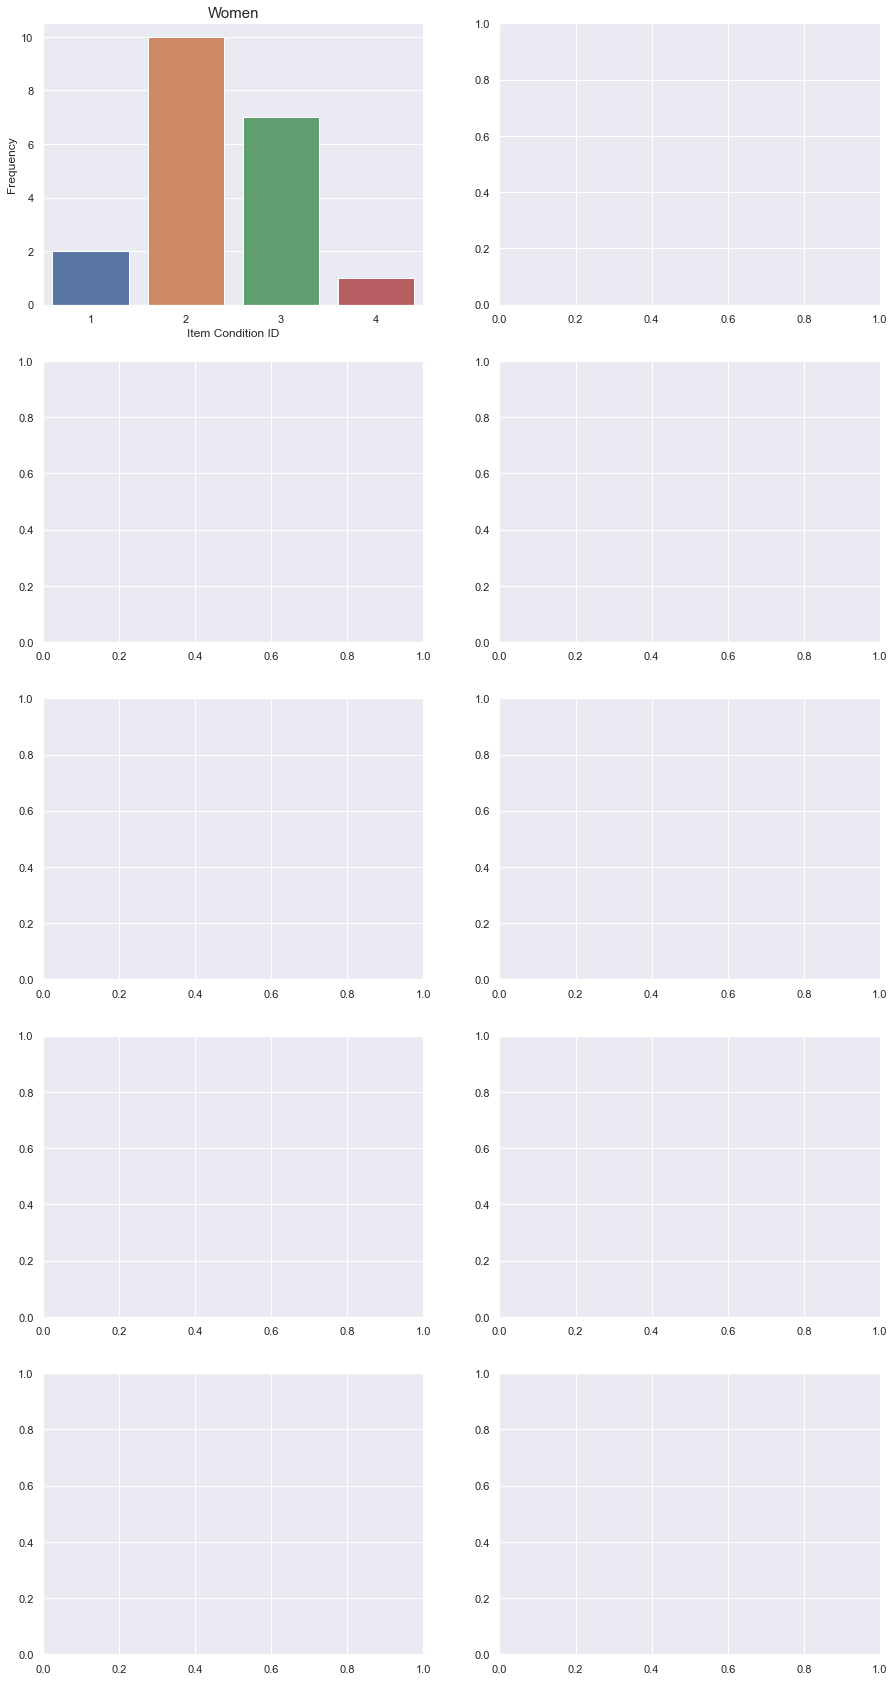

In [250]:
from collections import Counter
index = []
[index.append(key) for key, value in Counter(luldata['Main_categ']).most_common()]


f,axes = plt.subplots(5, 2, figsize=(15, 30))

for i in range(luldata['Main_categ'].nunique()):
    sns.countplot(luldata[luldata['Main_categ'] == index[i]]['item_condition_id'], ax = axes[int(i/2)][i%2])
    axes[int(i / 2)][i % 2].set_title(index[i],fontsize=15)
    axes[int(i / 2)][i % 2].set_xlabel('Item Condition ID')
    axes[int(i / 2)][i % 2].set_ylabel('Frequency')


## Step 2 : Applying Machine Learning Models


Coming to our actual problem, we will be now applying machine learing models to give us a price that we should suggest to the seller. As discussed earlier, this is a regression problem, so we will be applying some regressions models based on our data and other factors that we will face during solving.




In [255]:
# Seperating dependent and independent variables

feature_cols = ['item_condition_id', 'Main_categ', 'sub_categ1','sub_categ2', 'brand_name', 'shipping']
x = luldata[feature_cols] # Independent variables
y = np.log(luldata['price']) # Dependent variable

In [258]:
# Performing One hot encoding on categorical variables

cat_name = pd.get_dummies(luldata["Main_categ"], drop_first=True) # drop_first=True means dropping the redundant column
brd_name = pd.get_dummies(luldata["brand_name"], drop_first=True)
sub1_name = pd.get_dummies(luldata["sub_categ1"], drop_first=True)
sub2_name = pd.get_dummies(luldata["sub_categ2"], drop_first=True)

# removing the categorical columns
x.drop(['Main_categ', 'brand_name','sub_categ1', 'sub_categ2'], axis=1, inplace=True)
x1 = pd.concat([x, cat_name, brd_name, sub1_name, sub2_name], axis=1)

#### Spliting the data into train and test to validate the model

In [259]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x1, y, test_size=0.3, random_state=10)


#### OLS(Ordinary Least Squares Regression) Model:

In [260]:
from statsmodels.api import OLS
regr = OLS(y_train, x_train)
result = regr.fit()
print("Summary of OLS Model:-")
print(result.summary())

Summary of OLS Model:-
                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.957
Model:                            OLS   Adj. R-squared (uncentered):              0.880
Method:                 Least Squares   F-statistic:                              12.42
Date:                Mon, 07 Jun 2021   Prob (F-statistic):                     0.00634
Time:                        06:40:41   Log-Likelihood:                         -15.401
No. Observations:                  14   AIC:                                      48.80
Df Residuals:                       5   BIC:                                      54.55
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
                               coef    std err          t      P>|t|      [0.025      0.975]
----

**Important Note**

1. Not always **R-squared** is the best parameter to judge our model as sometimes no matter what we do, we can never get a proper R-squared value because the way in which the data is built. Hence we look after other deciding parameter called RMSLE.
2. We are calling **RMSLE** (Root Mean Squared log Error) instead of RMSE because we have taken the log of our dependent variable as it wasn't nomrally distributed.

**Insights from OLS model:**

* As we can see that the R-squared is almost close to 1 which means the predicted value of the training data is very similar to that of the test data
* The 2nd warning tells us that there are strong multi-collinearity problems or that the design matrix is singular because of the one hot encoding and many unique values in our data columns
* Hence this is one of the major drawbacks of this model in our case
* Other factors like Skewness (0.18), Kurtosis (2.94) i.e. almost close to Mesokurtic curve and Auto-correlation (0.54) tell us that model is not optimal, As a result we can't use this model to know the RMSLE as well as to predict the values
* For predicting the values for testing data we use linear regression and see if we can overcome the OLS model's drawbacks


**Linear Regression Model:**

In [261]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

y_pred_train = model.predict(x_train) # Predicting the value of train to compare with actual value
y_pred_test = model.predict(x_test) # Predicting the value of test data to compare with actual value

from sklearn.metrics import mean_squared_error
print("RMSLE value of Training Data is {a}".format(a=np.sqrt(mean_squared_error(y_train,y_pred_train))))
print("RMSLE value of Testing Data is {a}".format(a=np.sqrt(mean_squared_error(y_test,y_pred_test))))


RMSLE value of Training Data is 0.2802729035967515
RMSLE value of Testing Data is 0.7470023245334724


**Insights from Linear Model:**

* We can observe that training data has very less **rmsle** but the testing data the rmsle is significantly higher.

**Problem:**

* The data is containing multi-collinearity which can be seen in the RMSLE of testing data

**Solution:**

* Almost 99% of our columns are the dummies representing the categorical data and we cannot remove them and it would be futile to check the VIF of over 3500 columns
* Hence, we have to use algorithms which we can fine tune to optimize our model
* This leads us to a conclusion that there is a need to build models which can help us apply techniques like Dimension reduction, Regularization, Boosting or Bagging. Let's check them out one by one
* In ML, the ideal model is the one which has low bias i.e it can capture true relationship and low variability by producing consistent predictions across different datasets
* The methods used to do this are -

• Regularization • Boosting • Bagging

### Ridge Regression:

**Overview:**

* Ridge Regression comes under the Reglarization method
* It provides a way to create a simple model with great explanatory power when number of predictor variables in a dataset are very high and not very significant or when a datset has multi-collinearity
* It uses a type of Shrinkage Parameter called ridge estimator which belongs to a class of L2 regularization (λ)
* L2 regularization adds a penalty which equals the square of the magnitude of co-efficient
* All co-effs are shrunk by the same factor
* When λ = 0, ridge regression equals least squares regression and when λ = infinity, all co-effs are shrunk to 0
* Our goal here is to find the perfect λ value because as λ increases, error due to bias increases and as λ decreases, error due to variance increases

**Note:-** In python, While modelling the **λ** is considered as **alpha**

In [262]:
from sklearn.linear_model import Ridge
# from sklearn.model_selection import GridSearchCV
# parameters = {"alpha":[0.01,0.1,0,1,10,100]}
# ridgeReg = Ridge(solver = "lsqr", fit_intercept=False)
# lr_reg = GridSearchCV(ridgeReg,param_grid =parameters,n_jobs=-1)
# lr_reg.fit(x_train, y_train)

# By applying GridsearchCV, we get to know that the best parameter for the model is given by
# lr_reg.best_params_
# Output- {'alpha': 0.1}

ridgeReg = Ridge(alpha=0.1,solver="lsqr",fit_intercept=False)
ridgeReg.fit(x_train,y_train)

y_pred = ridgeReg.predict(x_test)
y_pred_train = ridgeReg.predict(x_train)
from sklearn.metrics import r2_score,mean_squared_error
rmse_test_ridge = np.sqrt(mean_squared_error(y_test,y_pred))
rmse_train_ridge = np.sqrt(mean_squared_error(y_train,y_pred_train))
print("RMSLE value of Training Data is {a}".format(a=rmse_train_ridge))
print("RMSLE value of Testing Data is {a}".format(a=rmse_test_ridge))

RMSLE value of Training Data is 0.7404107068561256
RMSLE value of Testing Data is 0.75171824279412


**Interpretation of RMSLE value:**

* It is a way of figuring out how much a model disagrees with the actual data
* The lower this number is, the better the fit of the model
* It is preferred that the value of RMSLE should be close to the minimum value of the response variable in test data

Checking the min and max values of y_test corresponding to our RMSLE value 0.75

In [263]:
print('Min value of y_test is',  min(y_test))
print('Max value of y_test is',  max(y_test))

Min value of y_test is 2.995732273553991
Max value of y_test is 4.795790545596741


**Insight from Ridge Model:**

As we can see that 2.99 is close to 4.80, we can conclude that our model is able to predict the value close to the actual value

### SGD(Stochastic Gradient Descent) Model:

**Overview:**

* In statistics, machine learning and data science fields, we optimize a lot of stuff
* When we fit a line with linear regression, we optimize the slope and intercept
* In logistic regression, we optimize the squiggly line
* In a similar way Gradient descent also helps optimize such things and much more
* In this case we have almost half billion data points and hence computations can take a long time
* This method uses a randomly selected subset of data at every step rather than full dataset
* This reduces the time spent calculating derivatives of loss function (Sum of squared Residuals)

In [264]:
from sklearn.linear_model import SGDRegressor,Ridge

# parameters = {"alpha": [0.01,0.1,0,1,10,100],
#               "l1_ratio": [0.4,0.5,0.6,0.7,0.8],
#               }
#
# model_sgd = SGDRegressor(loss="squared_loss",penalty="l2",
#                          learning_rate="invscaling",max_iter=100,
#                          fit_intercept=False)
#
# model_SGD = GridSearchCV(model_sgd,param_grid=parameters)
# model_SGD.fit(x_train,y_train)


# By applying GridsearchCV, we get to know that the best parameter for the model is given by
# print(model_SGD.best_params_)
# Output -  {'alpha': 0, 'l1_ratio': 0.4}

model_SGD = SGDRegressor(loss="squared_loss",penalty="l2",
                         learning_rate="invscaling",max_iter=100,
                         fit_intercept=False,alpha=0,l1_ratio=0.4)

model_SGD.fit(x_train,y_train)
y_pred_train_sgd = model_SGD.predict(x_train)
y_pred_test_sgd = model_SGD.predict(x_test)

from sklearn.metrics import r2_score,mean_squared_error

rmse_train = np.sqrt(mean_squared_error(y_train,y_pred_train_sgd))
rmse_test = np.sqrt(mean_squared_error(y_test,y_pred_test_sgd))
print("RMSLE value of Training Data is {a}".format(a=rmse_train))
print("RMSLE value of Testing Data is {a}".format(a=rmse_test))


RMSLE value of Training Data is 0.9326377662017342
RMSLE value of Testing Data is 0.8827358431219223


**Insight from SGD model:**

* We can see that the RMSLE is 0.88 which is greater than the RMSLE in the Ridge Model of 0.75

### Random Forest Regression Model:
* Decision trees have the possibility of overfitting and have inaccuracy for predictive learning as not all the variables give less impurity at each split
* Also they are not flexible with new data
* This problem is easily overcome by random forests as it combines the simplicity of the decision trees with flexibility resulting in a vast improvement in accuracy
* Bagging method is used to solve the problem we are facing
* Variance decreases because of the sub samples created and 1/3rd of the observations are left for validation purpose


Checking for best Parameters using Grid search -

In [ ]:
# from sklearn.model_selection import RandomizedSearchCV

# param_dist = {'n_estimators': [10,50,100,150,160,200,300],
#                'min_samples_split': [2,3,5,6],
#               "max_depth":[None,10,20,40,60,80]
#               }
# regr1 = RandomForestRegressor()
# n_iter_search = 50
# regr1 = RandomizedSearchCV(regr1, param_distributions=param_dist,
#                             n_iter=n_iter_search, cv=3,n_jobs=-1)

# regr1.fit(x_train, y_train)

# print(regr1.best_params_)
# output - {'n_estimators': 200, 'min_samples_split': 3,'max_depth=40'}


In [265]:
from sklearn.ensemble import RandomForestRegressor

model_rf = RandomForestRegressor(n_jobs=-1,min_samples_split=3,n_estimators=200,max_depth=40)
model_rf.fit(x_train,y_train)

y_pred_train_rf = model_rf.predict(x_train)
y_pred_test_rf = model_rf.predict(x_test)

from sklearn.metrics import mean_squared_error

rmse_train_rf = np.sqrt(mean_squared_error(y_train,y_pred_train_rf))
rmse_test_rf = np.sqrt(mean_squared_error(y_test,y_pred_test_rf))

print("RMSLE value of Training Data is {a}".format(a=rmse_train_rf))
print("RMSLE value of Testing Data is {a}".format(a=rmse_test_rf))

RMSLE value of Training Data is 0.25375984604455143
RMSLE value of Testing Data is 0.6765009996082239


**Insight from Random Forest Model:**

* RMSLE value we obtained here 0.68 is a tiny bit, yet better than the RMSLE we got in Ridge model, thus the best model so far


### Step 3: Final Conclusion

In [267]:
# For installation
pip install prettytable

Note: you may need to restart the kernel to use updated packages.


In [269]:
from prettytable import PrettyTable

x = PrettyTable()

x.field_names = ["Models", "HyperParameters used",  "RMSLE"]

x.add_row(["Ordinary Least Squares Regression", "---", '---'])
x.add_row(["Linear Regression", "---", 0.75])
x.add_row(["Ridge Regression", "alpha", 0.75])
x.add_row(["SGD Regressor","alpha, l1_ratio" , 0.88])
x.add_row(["Random Forest Regressor ","n_estimators, min_samples_split, max_depth" , 0.68])

print(x)

+-----------------------------------+--------------------------------------------+-------+
|               Models              |            HyperParameters used            | RMSLE |
+-----------------------------------+--------------------------------------------+-------+
| Ordinary Least Squares Regression |                    ---                     |  ---  |
|         Linear Regression         |                    ---                     |  0.75 |
|          Ridge Regression         |                   alpha                    |  0.75 |
|           SGD Regressor           |              alpha, l1_ratio               |  0.88 |
|      Random Forest Regressor      | n_estimators, min_samples_split, max_depth |  0.68 |
+-----------------------------------+--------------------------------------------+-------+


* We couldn't find RMSLE in OLS model and the Linear model had a very huge value
* **Multi-collinearity** in the data lead us to build models where we could fine tune it according to the best parameters provided by **grid search mechanism**
* Out of all the models we applied, **Random Forest Regressor** gave us the best and the lowest RMSLE value **0.68**
* Hence we can deploy this model at the clients machine so that sellers can get an estimate of the price they should set for their products
* Another solution would be making an app wherein the seller will enter the parameters one by one and after submitting he will get the result as the **Suggested Price** for the inputs provided by him/her